In [1]:
!pip install pandas matplotlib seaborn missingno sklearn --upgrade
!pip install numpy==1.23.5 scipy==1.9.3 --force-reinstall

  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached matplotlib-3.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached scipy-1.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
Using cached numpy-1.23.5-cp310-cp310-manylin

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
data = pd.read_csv('/content/Airbnb_Data.csv')

In [3]:
print("Dataset Info:")
data.info()

print("\nFirst 5 rows:")
print(data.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  

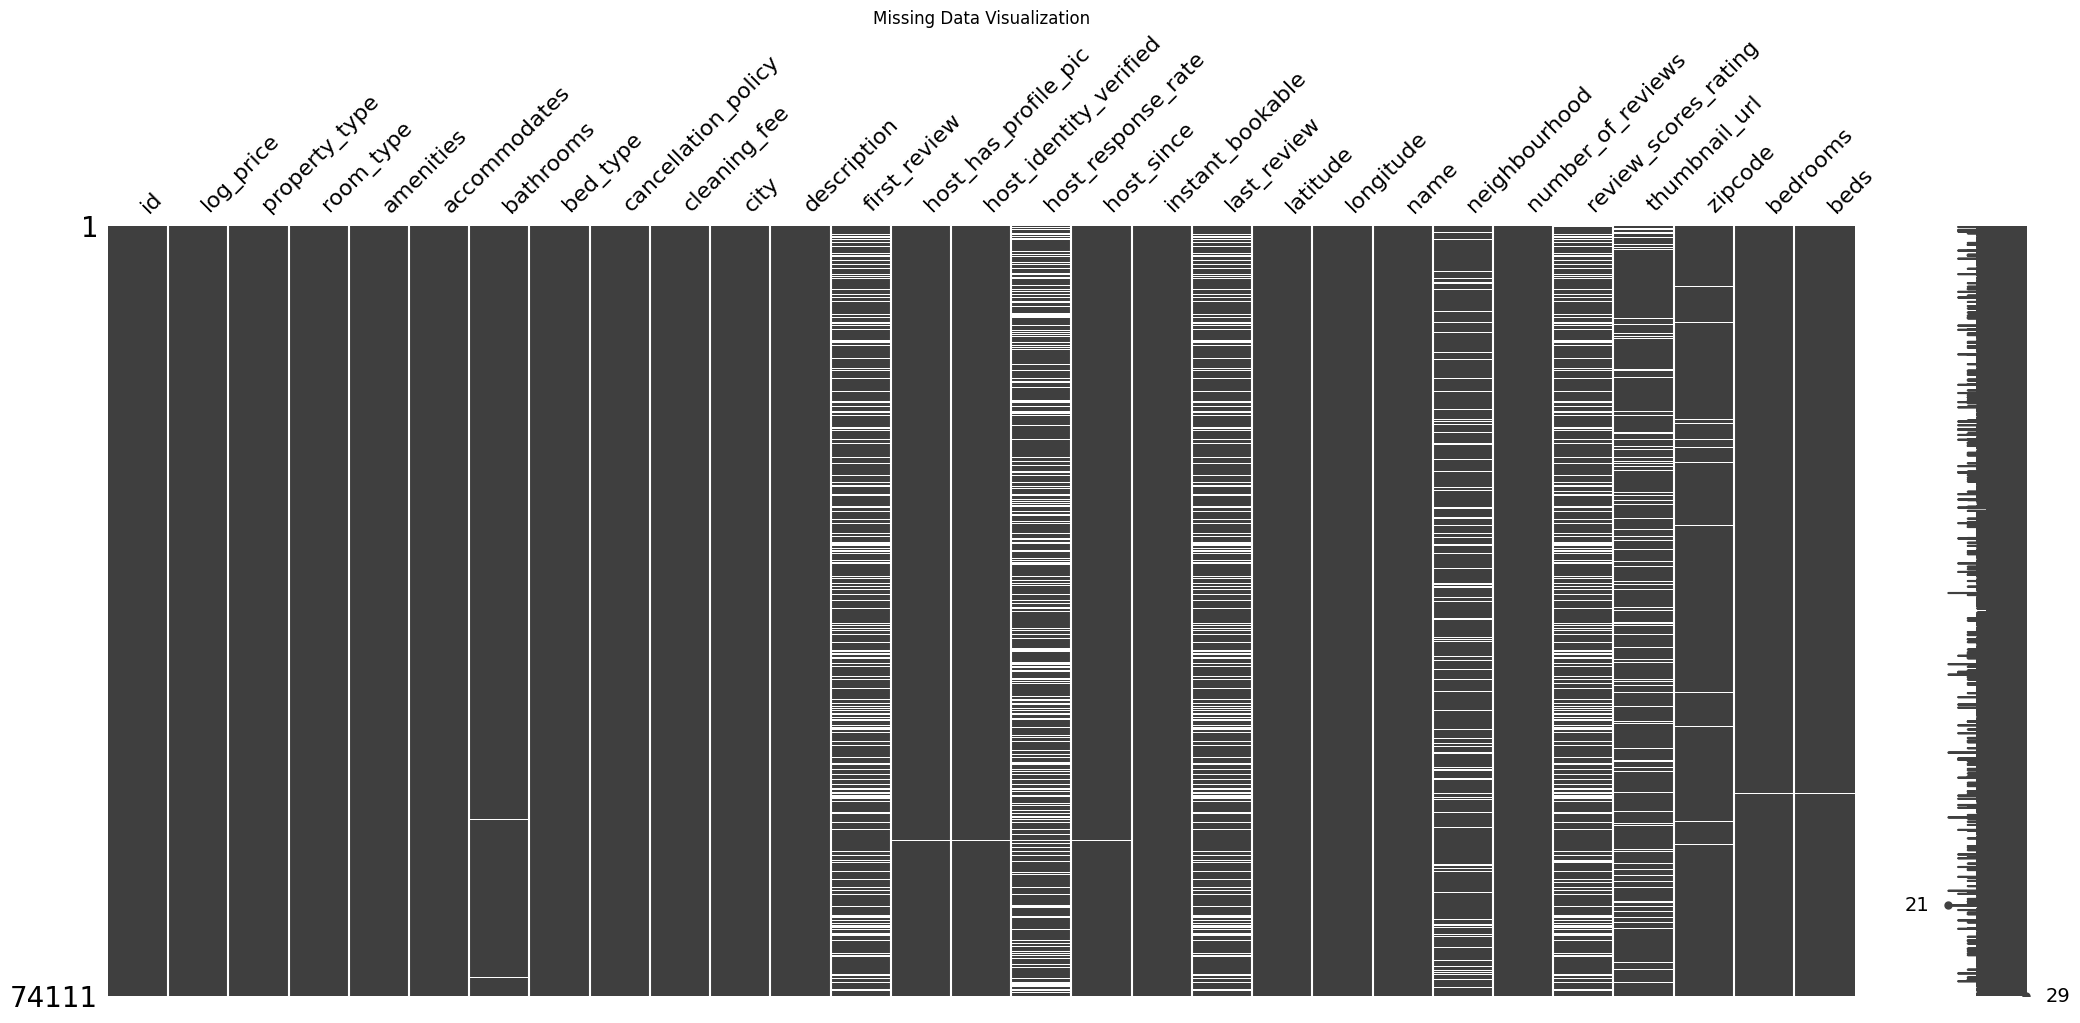


Handling Missing Values...


<ipython-input-4-b35475514535>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
<ipython-input-4-b35475514535>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin


Missing values handled successfully.

Summary Statistics:
                 id     log_price  accommodates     bathrooms      latitude  \
count  7.411100e+04  74111.000000  74111.000000  74111.000000  74111.000000   
mean   1.126662e+07      4.782069      3.155146      1.235263     38.445958   
std    6.081735e+06      0.717394      2.153589      0.581258      3.080167   
min    3.440000e+02      0.000000      1.000000      0.000000     33.338905   
25%    6.261964e+06      4.317488      2.000000      1.000000     34.127908   
50%    1.225415e+07      4.709530      2.000000      1.000000     40.662138   
75%    1.640226e+07      5.220356      4.000000      1.000000     40.746096   
max    2.123090e+07      7.600402     16.000000      8.000000     42.390437   

          longitude  number_of_reviews  review_scores_rating      bedrooms  \
count  74111.000000       74111.000000          74111.000000  74111.000000   
mean     -92.397525          20.900568             94.067365      1.26579

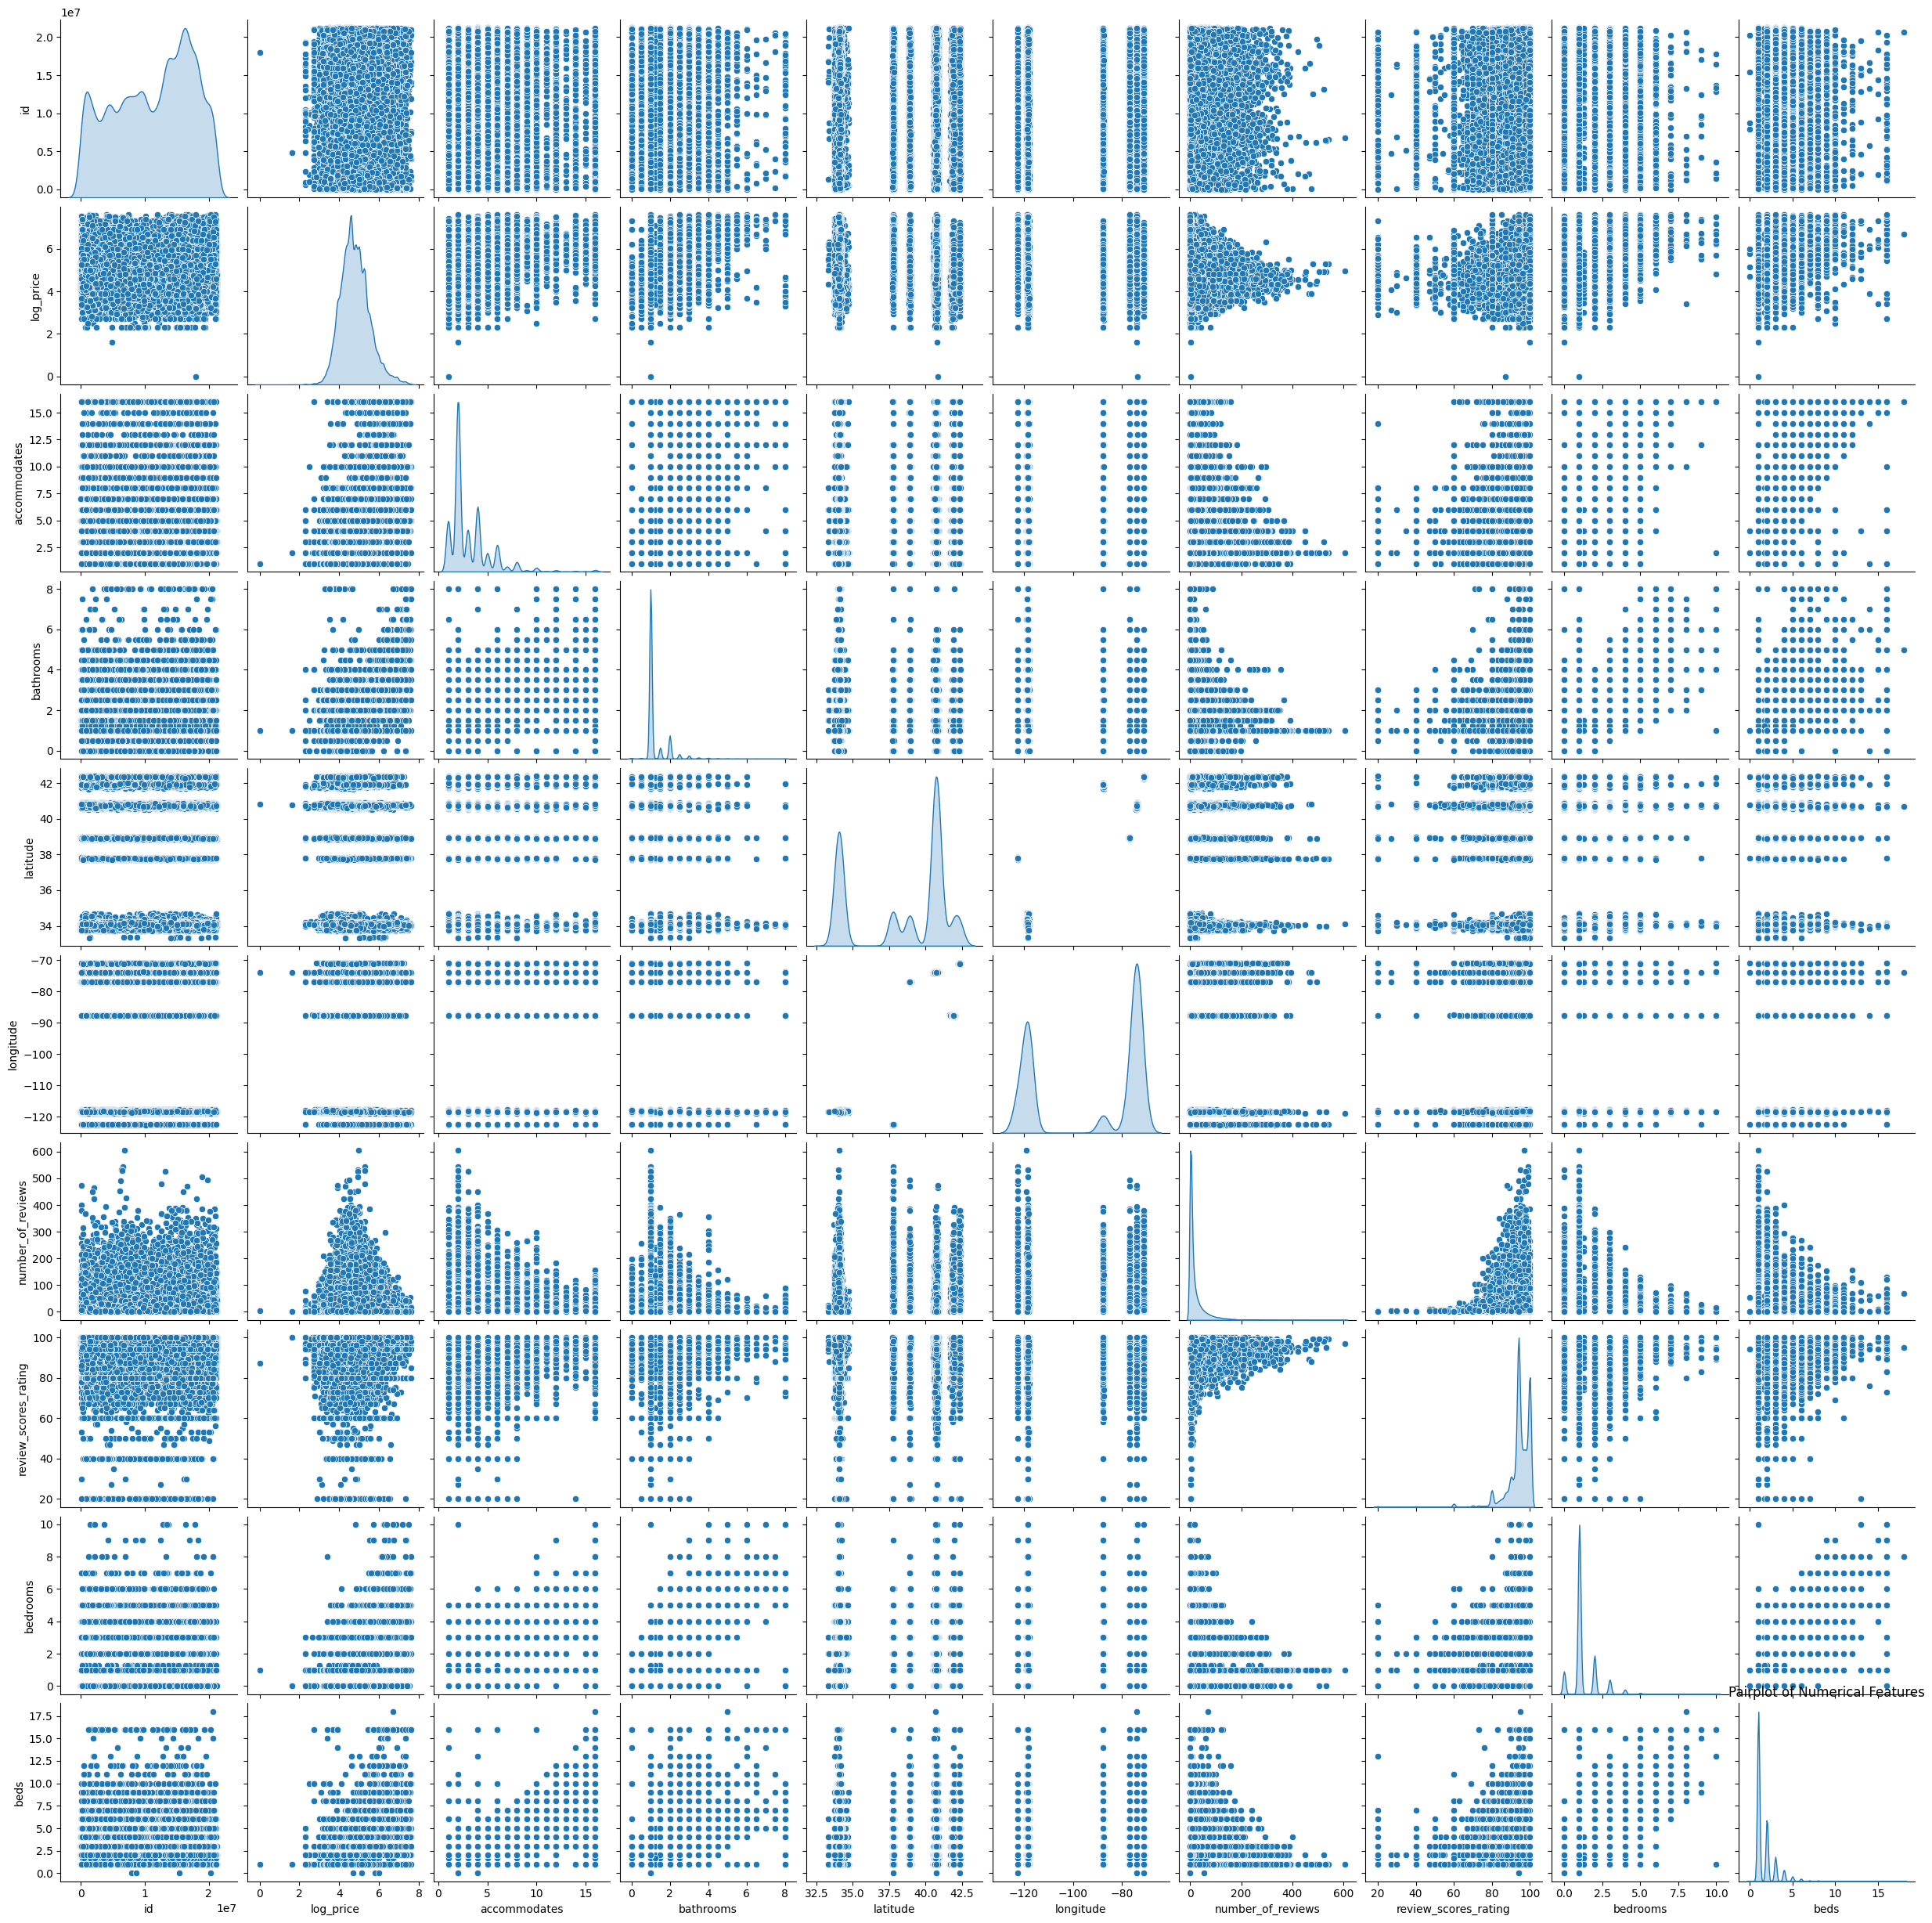


Generating Correlation Heatmap...


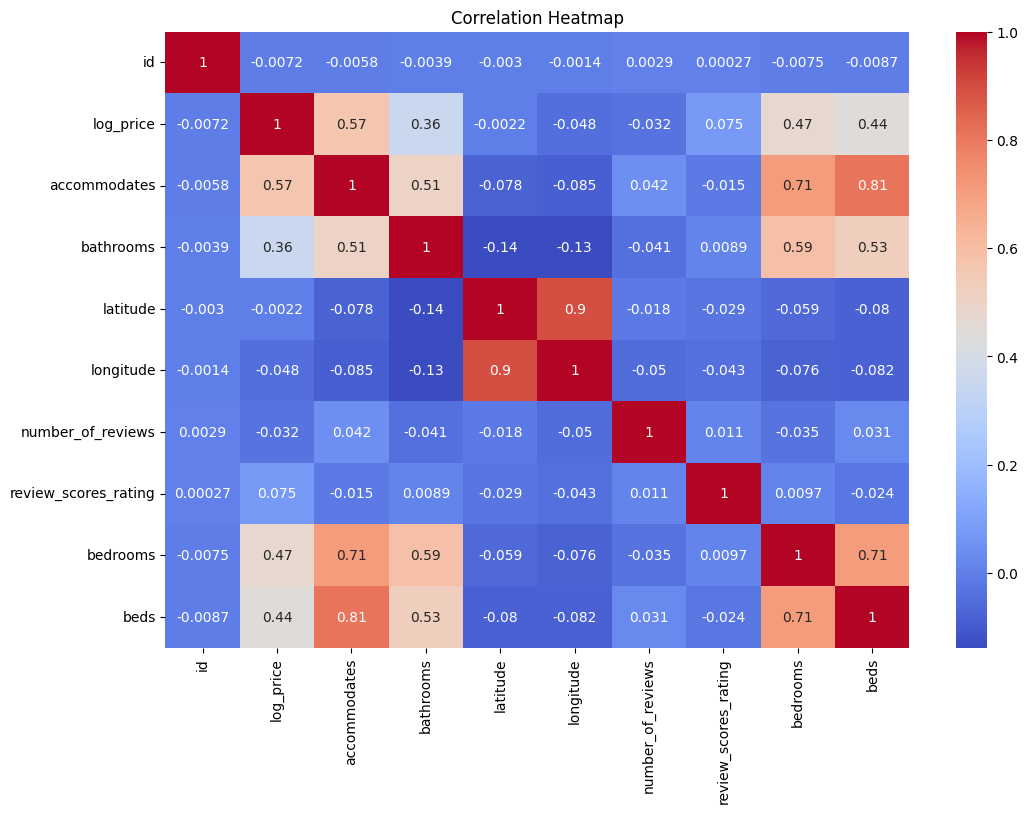

In [4]:
# Visualize missing data
msno.matrix(data)
plt.title("Missing Data Visualization")
plt.show()

print("\nHandling Missing Values...")
for col in data.columns:
    if data[col].isnull().sum() > 0:
        if data[col].dtype == 'object':  # Categorical columns
            data[col].fillna(data[col].mode()[0], inplace=True)
        else:  # Numerical columns
            data[col].fillna(data[col].mean(), inplace=True)

print("\nMissing values handled successfully.")

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Pairplot for relationships between features
sns.pairplot(data.select_dtypes(include=[np.number]), diag_kind='kde')
plt.title("Pairplot of Numerical Features")
plt.show()

numeric_data = data.select_dtypes(include=[np.number])
# Correlation heatmap
print("\nGenerating Correlation Heatmap...")
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [5]:
# Option 1: Label Encoding (Recommended for high-cardinality features)
print("\nEncoding Categorical Variables with Label Encoding...")
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

print("\nCategorical variables encoded using Label Encoding.")


print("\nEncoding Categorical Variables with Frequency Encoding...")
for col in categorical_columns:
    freq = data[col].value_counts(normalize=True)
    data[col] = data[col].map(freq)


print("\nEncoding Categorical Variables with Target Encoding...")
if 'price_category' in data.columns:  # Ensure target exists
    for col in categorical_columns:
        target_mean = data.groupby(col)['price_category'].mean()
        data[col] = data[col].map(target_mean)


Encoding Categorical Variables with Label Encoding...

Categorical variables encoded using Label Encoding.

Encoding Categorical Variables with Frequency Encoding...

Encoding Categorical Variables with Target Encoding...


In [6]:
print("\nOptimizing Memory Usage by Downcasting Numeric Columns...")
for col in data.select_dtypes(include=['int', 'float']).columns:
    if pd.api.types.is_integer_dtype(data[col]):
        data[col] = pd.to_numeric(data[col], downcast='integer')
    elif pd.api.types.is_float_dtype(data[col]):
        data[col] = pd.to_numeric(data[col], downcast='float')

print("\nNumeric columns downcasted to lower precision.")


Optimizing Memory Usage by Downcasting Numeric Columns...

Numeric columns downcasted to lower precision.


In [7]:
print("\nRemoving Low-Variance Features...")
selector = VarianceThreshold(threshold=0.01)  # Threshold for variance
data_reduced = selector.fit_transform(data)

# Recreate the DataFrame with selected features
selected_columns = data.columns[selector.get_support()]
data = pd.DataFrame(data_reduced, columns=selected_columns)

print("\nLow-variance features removed successfully.")
print("\nDataset shape after preprocessing:", data.shape)


Removing Low-Variance Features...

Low-variance features removed successfully.

Dataset shape after preprocessing: (74111, 18)


In [8]:
# Create a target variable (example: 'price_category' based on 'price')
print("\nCreating Target Variable for Modeling...")
if 'price' in data.columns:
    median_price = data['price'].median()
    data['price_category'] = (data['price'] > median_price).astype(int)
else:
    print("Price column not found. Creating a dummy target variable.")
    data['price_category'] = np.random.randint(0, 2, len(data))

# Drop unnecessary columns (e.g., original price column)
if 'price' in data.columns:
    data.drop(columns=['price'], inplace=True)

# Split into train and test sets
print("\nSplitting Data into Train and Test Sets...")
X = data.drop(columns=['price_category'])
y = data['price_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
print("\nTraining Random Forest Model...")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
print("\nEvaluating the Model...")
y_pred = rf_model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))



Creating Target Variable for Modeling...
Price column not found. Creating a dummy target variable.

Splitting Data into Train and Test Sets...

Training Random Forest Model...

Evaluating the Model...
Confusion Matrix:
 [[4095 3382]
 [3959 3387]]

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.55      0.53      7477
           1       0.50      0.46      0.48      7346

    accuracy                           0.50     14823
   macro avg       0.50      0.50      0.50     14823
weighted avg       0.50      0.50      0.50     14823

Accuracy Score: 0.504756122242461


In [9]:
data.to_csv("processed_airbnb_data.csv", index=False)
print("\nProcessed dataset saved as 'processed_airbnb_data.csv'.")

# Save the trained model
import joblib
joblib.dump(rf_model, "airbnb_rf_model.pkl")
print("Trained model saved as 'airbnb_rf_model.pkl'.")


Processed dataset saved as 'processed_airbnb_data.csv'.
Trained model saved as 'airbnb_rf_model.pkl'.
